In [1]:
import pandas as pd

# TCGA data import
tcga_mat = pd.read_csv('InputData/TCGA/gsva_signature_matrix.csv', index_col=0)
tcga_ttest = pd.read_csv('InputData/TCGA/tcga_gsva.csv', index_col='sig_names')
tcga_cluster = pd.read_csv('Results/TCGA_clustering_results.csv', index_col=0)

# UROMOL data import
uromol_mat = pd.read_csv('InputData/UROMOL/gsva_signature_matrix.csv', index_col=0)
uromol_ttest = pd.read_csv('InputData/UROMOL/uromol_gsva.csv', index_col='sig_names')
uromol_cluster = pd.read_csv('Results/UROMOL_clustering_results.csv', index_col=0)

In [62]:
sig = 'AG.Robertson.2017.BLCA_neuroendocrine_markers'

print(tcga_ttest.loc[sig, :])
print(uromol_ttest.loc[sig, :])

Unnamed: 0          224
p.value        0.013283
cluster0      -0.107706
cluster1       0.144423
statistic     -0.252129
p.adj          0.016247
log10pvalue    1.876717
stars                 *
Name: AG.Robertson.2017.BLCA_neuroendocrine_markers, dtype: object
Unnamed: 0          204
p.value        0.121864
cluster0      -0.032967
cluster1       0.120781
statistic     -0.153748
p.adj           0.16368
log10pvalue    0.914125
stars                 +
Name: AG.Robertson.2017.BLCA_neuroendocrine_markers, dtype: object


In [2]:
differentiation = ['AG.Robertson.2017.BLCA_luminal_markers',
                   'AG.Robertson.2017.BLCA_basal_markers',
                   'AG.Robertson.2017.BLCA_squamous_differentiation_markers',
                   'AG.Robertson.2017.BLCA_neuroendocrine_markers']
immune_impact = ['Immune_Checkpoint',
                 'TGFb_Family_Member_Li_et_al',
                 'T_cell_exhaustion_Peng_et_al']

tcga_important_sig_diff = tcga_mat.loc[:, differentiation]
uromol_important_sig_diff = uromol_mat.loc[:, differentiation]
tcga_important_sig_imm = tcga_mat.loc[:, immune_impact]
uromol_important_sig_imm = uromol_mat.loc[:, immune_impact]

tcga_sig_clust_diff = pd.concat([tcga_cluster, tcga_important_sig_diff], axis=1, join='inner')
uromol_sig_clust_diff = pd.concat([uromol_cluster, uromol_important_sig_diff], axis=1, join='inner')
tcga_sig_clust_diff.columns = tcga_sig_clust_diff.columns.astype(str)
uromol_sig_clust_diff.columns = uromol_sig_clust_diff.columns.astype(str)

tcga_sig_clust_imm = pd.concat([tcga_cluster, tcga_important_sig_imm], axis=1, join='inner')
uromol_sig_clust_imm = pd.concat([uromol_cluster, uromol_important_sig_imm], axis=1, join='inner')
tcga_sig_clust_imm.columns = tcga_sig_clust_imm.columns.astype(str)
uromol_sig_clust_imm.columns = uromol_sig_clust_imm.columns.astype(str)

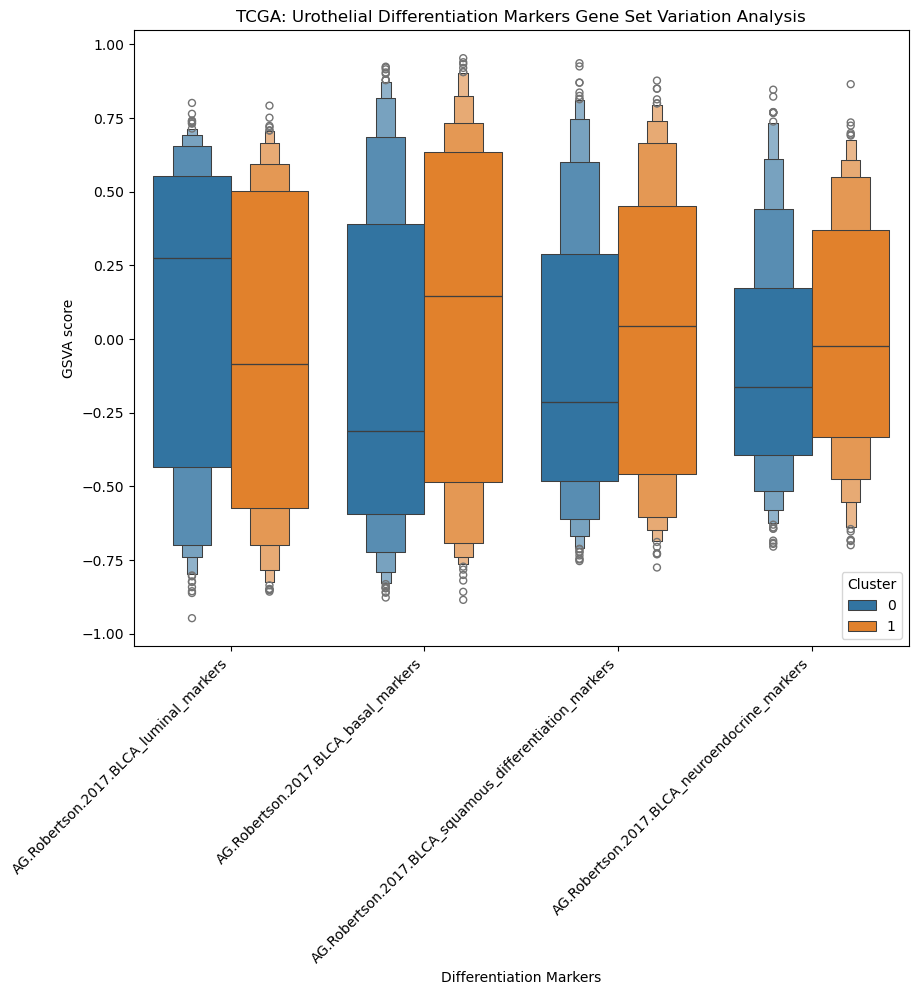

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the dataframe
melted = tcga_sig_clust_diff.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Force Feature column to be string (just in case)
melted['Feature'] = melted['Feature'].astype(str)

# Plot
plt.figure(figsize=(10, 8))
sns.boxenplot(data=melted, x='Feature', y='Value', hue='Cluster')

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title("TCGA: Urothelial Differentiation Markers Gene Set Variation Analysis")
plt.show()


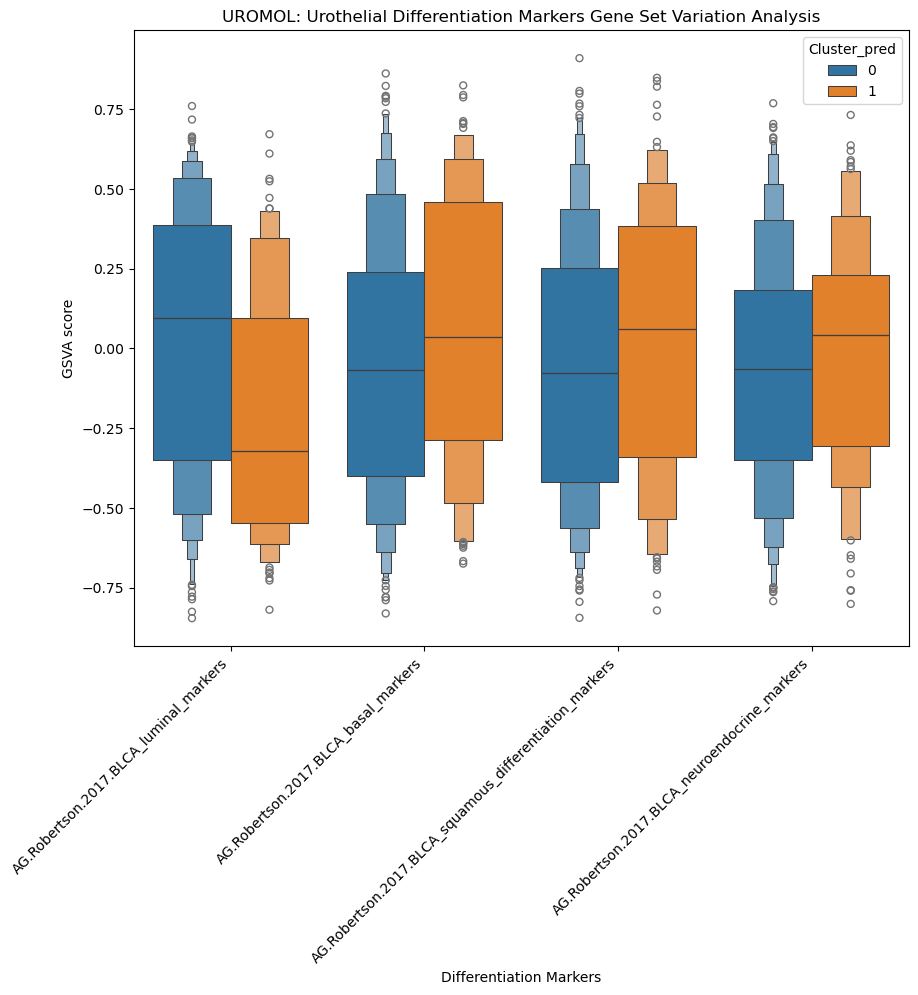

In [39]:
# Melt the dataframe
melted = uromol_sig_clust_diff.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value')

# Force Feature column to be string (just in case)
melted['Feature'] = melted['Feature'].astype(str)

# Plot
plt.figure(figsize=(10, 8))
sns.boxenplot(data=melted, x='Feature', y='Value', hue='Cluster_pred')

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title("UROMOL: Urothelial Differentiation Markers Gene Set Variation Analysis")
plt.show()

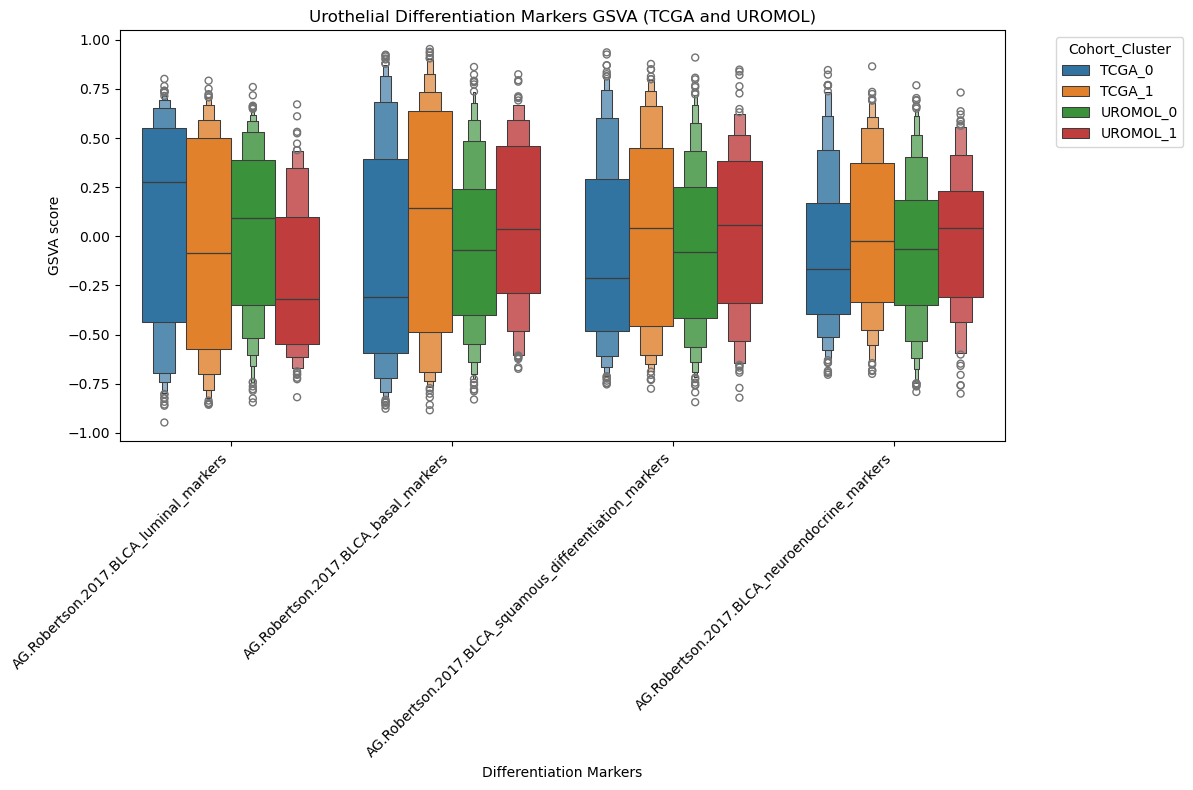

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt both dataframes
tcga_melted = tcga_sig_clust_diff.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
uromol_melted = uromol_sig_clust_diff.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value')

# Rename cluster column in UROMOL to match TCGA
uromol_melted = uromol_melted.rename(columns={'Cluster_pred': 'Cluster'})

# Add source information
tcga_melted['Cohort'] = 'TCGA'
uromol_melted['Cohort'] = 'UROMOL'

# Combine both melted dataframes
combined = pd.concat([tcga_melted, uromol_melted], ignore_index=True)

# Optional: prefix cluster with cohort for clarity
combined['Cluster'] = combined['Cohort'] + '_' + combined['Cluster'].astype(str)

# Add dummy gap category after TCGA
combined['Cluster'] = combined['Cluster'].replace({
    'UROMOL_0': 'GAP_UROMOL_0',
    'UROMOL_1': 'GAP_UROMOL_1'
})

# Updated hue order with dummy gap
hue_order = ['TCGA_0', 'TCGA_1', 'GAP_UROMOL_0', 'GAP_UROMOL_1']

# Define a color palette with a light grey gap color
palette = {
    'TCGA_0': '#1f77b4',
    'TCGA_1': '#ff7f0e',
    'GAP_UROMOL_0': '#2ca02c',
    'GAP_UROMOL_1': '#d62728',
}

# Plot
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=combined,
    x='Feature',
    y='Value',
    hue='Cluster',
    hue_order=hue_order,
    palette=palette
)

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title("Urothelial Differentiation Markers GSVA (TCGA and UROMOL)")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['TCGA_0', 'TCGA_1', 'UROMOL_0', 'UROMOL_1']
plt.legend(handles, labels, title='Cohort_Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

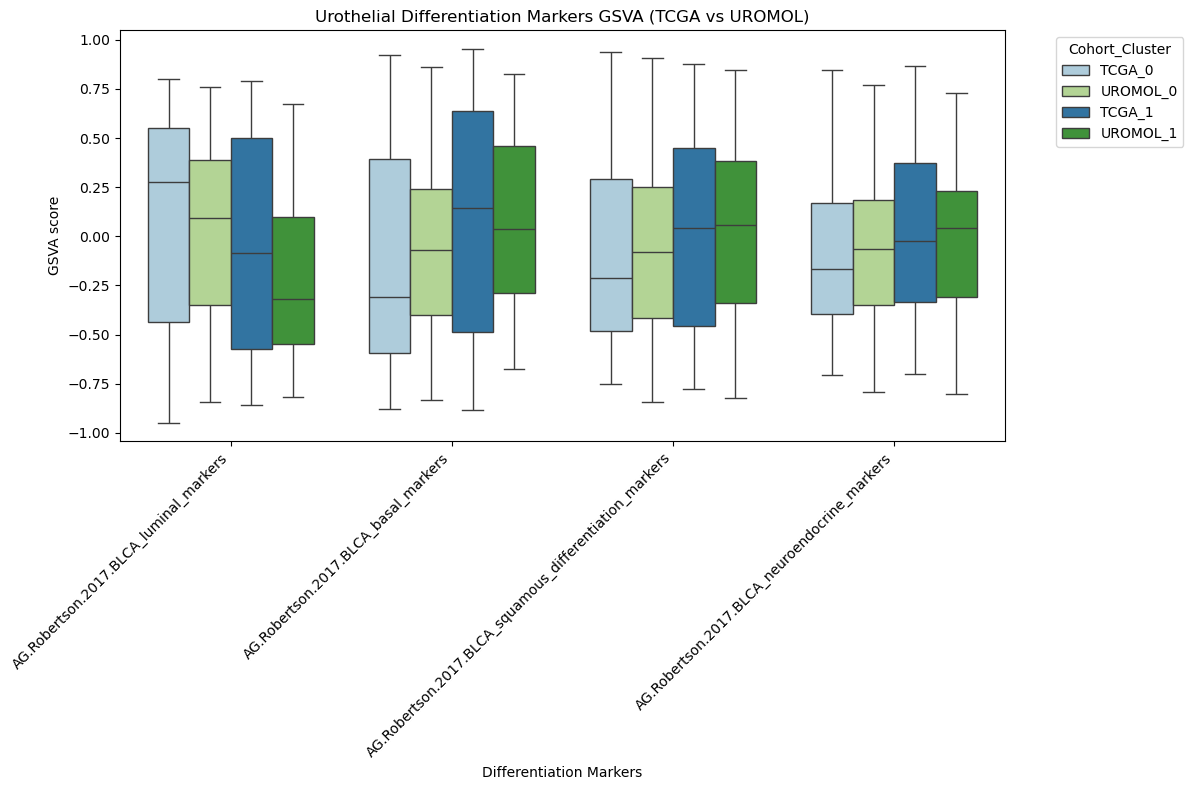

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- reshape exactly as before ---
tcga_melted  = tcga_sig_clust_diff.melt(id_vars='Cluster',      var_name='Feature', value_name='Value')
uromol_melted = uromol_sig_clust_diff.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value') \
                                      .rename(columns={'Cluster_pred': 'Cluster'})

tcga_melted['Cohort']   = 'TCGA'
uromol_melted['Cohort'] = 'UROMOL'
combined = pd.concat([tcga_melted, uromol_melted], ignore_index=True)

# label points as Cohort_Cluster (e.g. TCGA_0)
combined['Cluster'] = combined['Cohort'] + '_' + combined['Cluster'].astype(str)

# exact plotting order
hue_order = ['TCGA_0', 'UROMOL_0', 'TCGA_1', 'UROMOL_1']

# colour map
palette = {
    'TCGA_0'  : '#a6cee3',   # light blue
    'TCGA_1'  : '#1f78b4',   # blue
    'UROMOL_0': '#b2df8a',   # light green
    'UROMOL_1': '#33a02c'    # green
}

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=combined,
    x='Feature',
    y='Value',
    hue='Cluster',
    hue_order=hue_order,
    palette=palette,
    showfliers=False,     # hide outliers (set to True if you want them)
    width=0.75,           # box width; adjust to taste
    whis=1.5              # whisker length (1.5×IQR is the default)
)

# tidy up
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title('Urothelial Differentiation Markers GSVA (TCGA vs UROMOL)')

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, hue_order, title='Cohort_Cluster',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


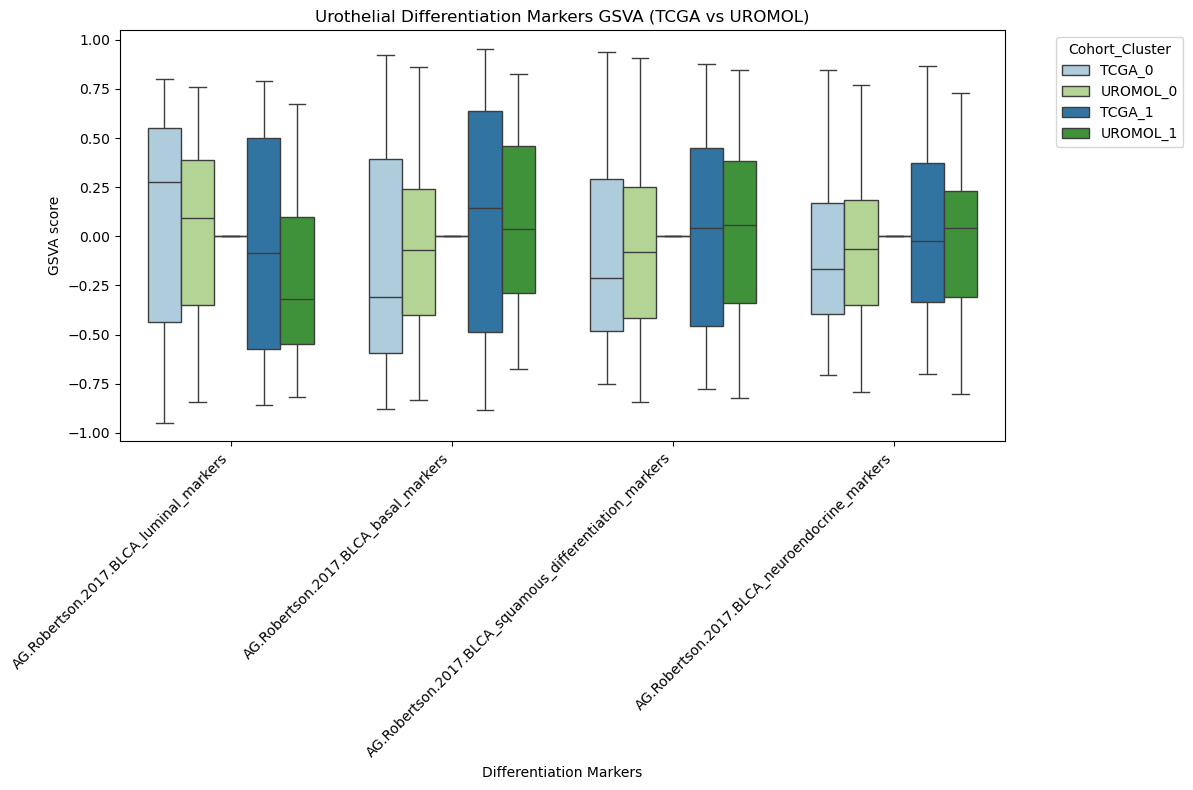

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# -------------------------------------------------
# 1. Prepare the data exactly as in the previous
#    message – including the transparent 'GAP'.
# -------------------------------------------------
tcga_melted  = tcga_sig_clust_diff.melt(id_vars='Cluster',      var_name='Feature', value_name='Value')
uromol_melted = uromol_sig_clust_diff.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value') \
                                      .rename(columns={'Cluster_pred': 'Cluster'})

tcga_melted['Cohort']   = 'TCGA'
uromol_melted['Cohort'] = 'UROMOL'
combined = pd.concat([tcga_melted, uromol_melted], ignore_index=True)
combined['Cluster'] = combined['Cohort'] + '_' + combined['Cluster'].astype(str)

# add the dummy gap rows (one per feature)
gap_rows = pd.DataFrame({
    'Feature': combined['Feature'].unique(),
    'Value'  : 0,
    'Cluster': 'GAP',
    'Cohort' : ''
})
combined = pd.concat([combined, gap_rows], ignore_index=True)

hue_order = ['TCGA_0', 'UROMOL_0', 'GAP', 'TCGA_1', 'UROMOL_1']
palette = {
    'TCGA_0'  : '#a6cee3',      # light blue
    'TCGA_1'  : '#1f78b4',      # blue
    'UROMOL_0': '#b2df8a',      # light green
    'UROMOL_1': '#33a02c',      # green
    'GAP'     : (1, 1, 1, 0)    # fully transparent
}

plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=combined,
    x='Feature',
    y='Value',
    hue='Cluster',
    hue_order=hue_order,
    palette=palette,
    showfliers=False,
    whis=1.5,
    width=0.75
)

# -------------------------------------------------
# 2. Draw a white rectangle that covers half the gap
# -------------------------------------------------
# find any one patch that belongs to 'GAP' – they all
# share the same width, so we can grab geometry there
for patch in ax.artists:
    if patch.get_facecolor()[3] == 0:     # transparencies alpha==0
        gap_x     = patch.get_x()
        gap_w     = patch.get_width()
        gap_ymin, gap_ymax = ax.get_ylim()
        # cover *half* of that slot (adjust 0.50 → any fraction you like)
        ax.add_patch(
            Rectangle(
                (gap_x + gap_w*0.25, gap_ymin),  # start ¼ in from left
                gap_w*0.50,                      # cover ½ the slot
                gap_ymax - gap_ymin,
                facecolor='white',
                edgecolor='none',
                zorder=3          # above boxes, below axes spines
            )
        )
        break   # only need one

# -------------------------------------------------
# 3. Remove the dummy from the legend, tidy labels
# -------------------------------------------------
handles, labels = ax.get_legend_handles_labels()
ax.legend([h for h,l in zip(handles,labels) if l!='GAP'],
          [l for l   in labels           if l!='GAP'],
          title='Cohort_Cluster',
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title('Urothelial Differentiation Markers GSVA (TCGA vs UROMOL)')
plt.tight_layout()
plt.show()


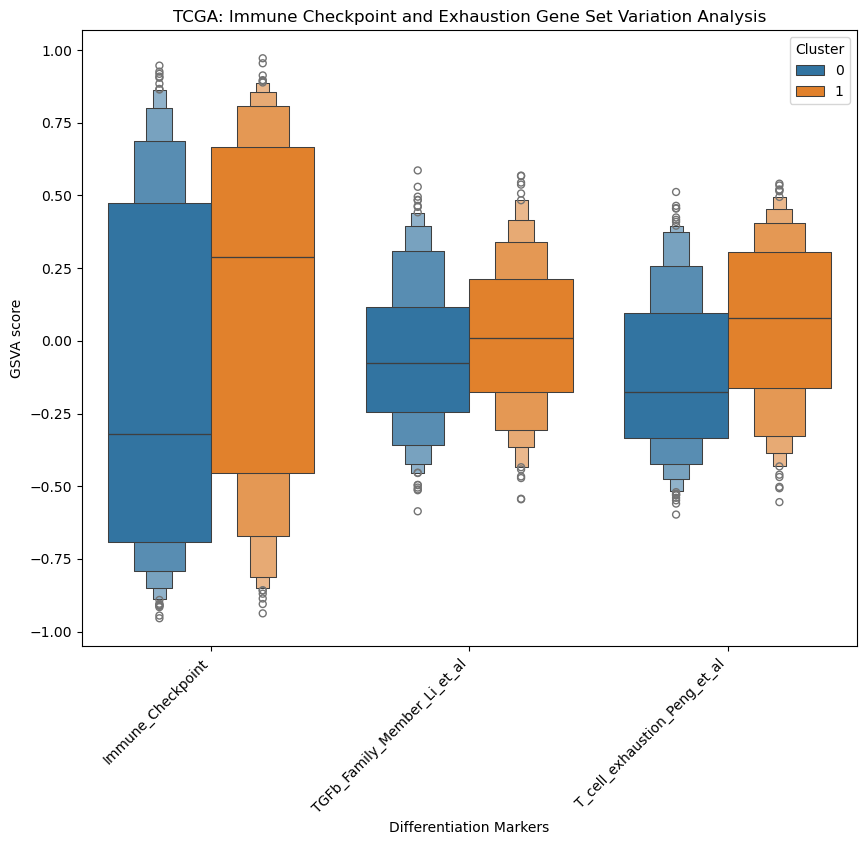

In [40]:
# Melt the dataframe
melted = tcga_sig_clust_imm.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

# Force Feature column to be string (just in case)
melted['Feature'] = melted['Feature'].astype(str)

# Plot
plt.figure(figsize=(10, 8))
sns.boxenplot(data=melted, x='Feature', y='Value', hue='Cluster')

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title("TCGA: Immune Checkpoint and Exhaustion Gene Set Variation Analysis")
plt.show()

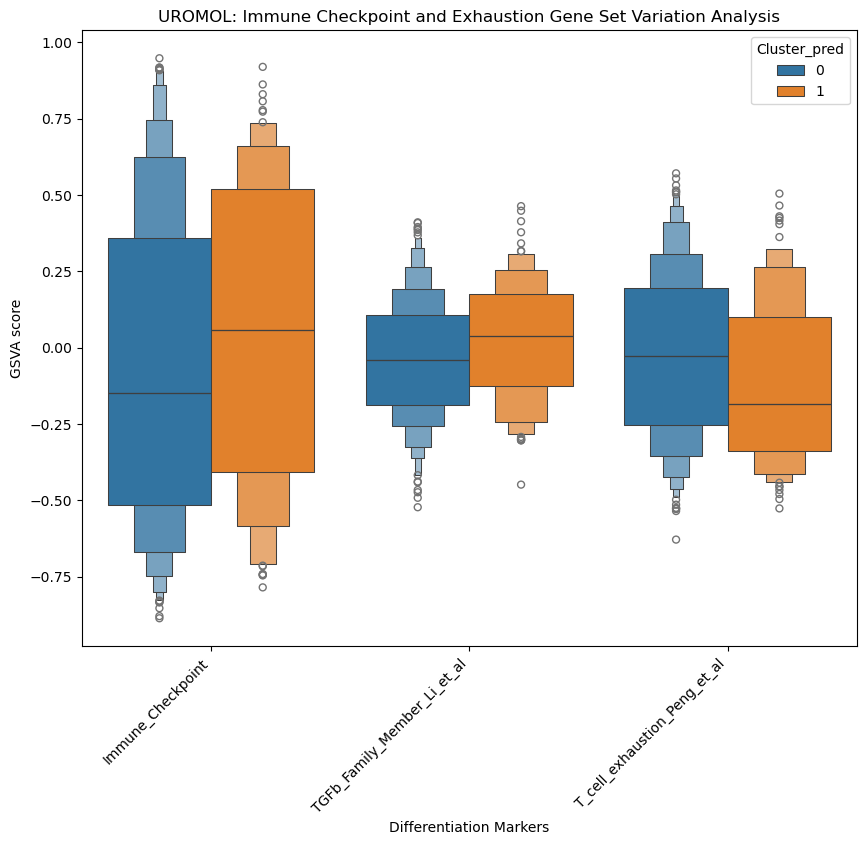

In [41]:
# Melt the dataframe
melted = uromol_sig_clust_imm.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value')

# Force Feature column to be string (just in case)
melted['Feature'] = melted['Feature'].astype(str)

# Plot
plt.figure(figsize=(10, 8))
sns.boxenplot(data=melted, x='Feature', y='Value', hue='Cluster_pred')

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Differentiation Markers')
plt.ylabel('GSVA score')
plt.title("UROMOL: Immune Checkpoint and Exhaustion Gene Set Variation Analysis")
plt.show()

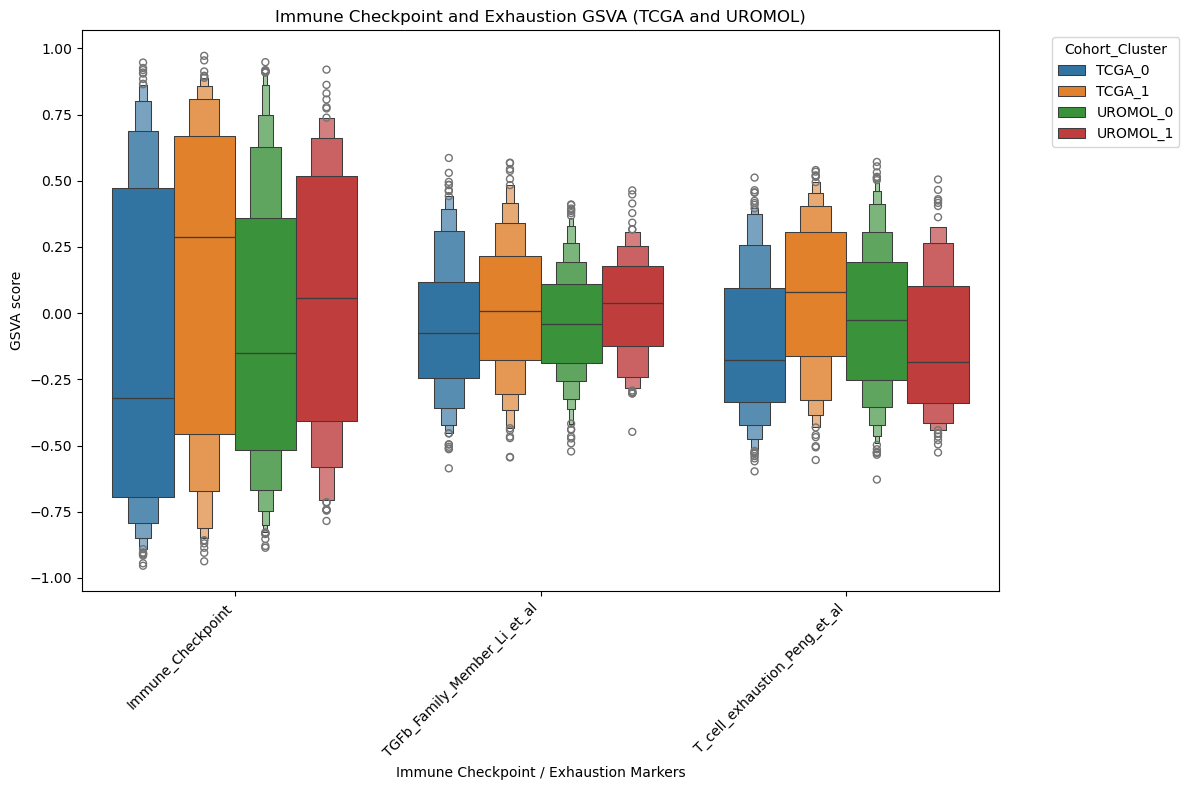

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt both dataframes
tcga_imm_melted = tcga_sig_clust_imm.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
uromol_imm_melted = uromol_sig_clust_imm.melt(id_vars='Cluster_pred', var_name='Feature', value_name='Value')

# Standardize column names
uromol_imm_melted = uromol_imm_melted.rename(columns={'Cluster_pred': 'Cluster'})

# Add cohort label
tcga_imm_melted['Cohort'] = 'TCGA'
uromol_imm_melted['Cohort'] = 'UROMOL'

# Combine both
combined_imm = pd.concat([tcga_imm_melted, uromol_imm_melted], ignore_index=True)

# Create unified cluster names and dummy gap
combined_imm['Cluster'] = combined_imm['Cohort'] + '_' + combined_imm['Cluster'].astype(str)
combined_imm['Cluster'] = combined_imm['Cluster'].replace({
    'UROMOL_0': 'GAP_UROMOL_0',
    'UROMOL_1': 'GAP_UROMOL_1'
})

# Define order and custom palette
hue_order = ['TCGA_0', 'TCGA_1', 'GAP_UROMOL_0', 'GAP_UROMOL_1']
palette = {
    'TCGA_0': '#1f77b4',
    'TCGA_1': '#ff7f0e',
    'GAP_UROMOL_0': '#2ca02c',
    'GAP_UROMOL_1': '#d62728',
}

# Plot
plt.figure(figsize=(12, 8))
sns.boxenplot(
    data=combined_imm,
    x='Feature',
    y='Value',
    hue='Cluster',
    hue_order=hue_order,
    palette=palette
)

# Format
plt.xticks(rotation=45, ha='right')
plt.xlabel('Immune Checkpoint / Exhaustion Markers')
plt.ylabel('GSVA score')
plt.title("Immune Checkpoint and Exhaustion GSVA (TCGA and UROMOL)")

# Fix legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['TCGA_0', 'TCGA_1', 'UROMOL_0', 'UROMOL_1']
plt.legend(handles, labels, title='Cohort_Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

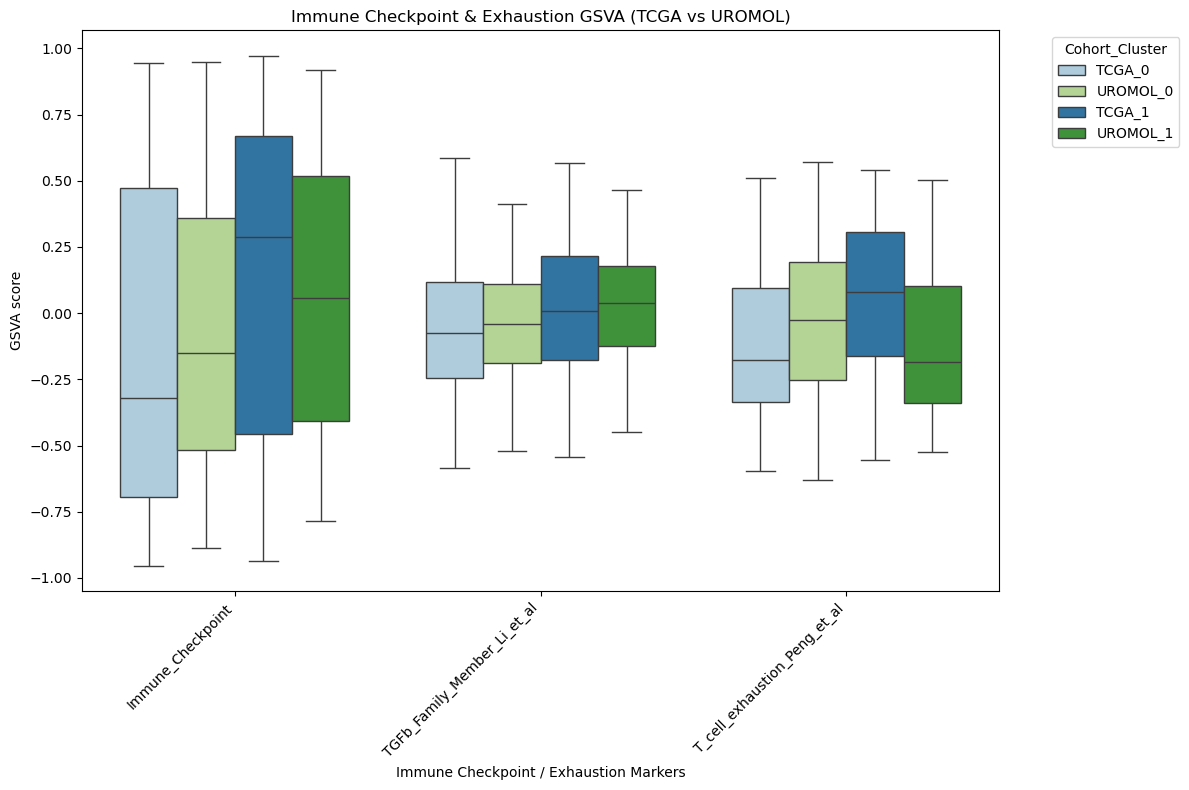

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ── 1.  Reshape  ─────────────────────────────────────────────
tcga_imm_melted   = tcga_sig_clust_imm.melt(
    id_vars='Cluster', var_name='Feature', value_name='Value'
)
uromol_imm_melted = uromol_sig_clust_imm.melt(
    id_vars='Cluster_pred', var_name='Feature', value_name='Value'
).rename(columns={'Cluster_pred': 'Cluster'})

tcga_imm_melted['Cohort']   = 'TCGA'
uromol_imm_melted['Cohort'] = 'UROMOL'
combined = pd.concat([tcga_imm_melted, uromol_imm_melted], ignore_index=True)

# Cohort_Cluster labels (e.g. TCGA_0)
combined['Cluster'] = combined['Cohort'] + '_' + combined['Cluster'].astype(str)

# ── 2.  Plot parameters ─────────────────────────────────────
hue_order = ['TCGA_0', 'UROMOL_0', 'TCGA_1', 'UROMOL_1']
palette   = {
    'TCGA_0'  : '#a6cee3',  # light blue
    'TCGA_1'  : '#1f78b4',  # blue
    'UROMOL_0': '#b2df8a',  # light green
    'UROMOL_1': '#33a02c'   # green
}

plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=combined,
    x='Feature',
    y='Value',
    hue='Cluster',
    hue_order=hue_order,
    palette=palette,
    showfliers=False,   # hide outliers (toggle True if needed)
    width=0.75,
    whis=1.5
)

# ── 3.  Labels, legend, layout ──────────────────────────────
ax.set_xlabel('Immune Checkpoint / Exhaustion Markers')
ax.set_ylabel('GSVA score')
ax.set_title('Immune Checkpoint & Exhaustion GSVA (TCGA vs UROMOL)')
plt.xticks(rotation=45, ha='right')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, hue_order, title='Cohort_Cluster',
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
